<a href="https://colab.research.google.com/github/Maria-Sanjana/SIT723-ResearchProject_A_Maria/blob/main/diabetesdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# importing the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

In [29]:
#Loading the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diabetes.csv')

Saving diabetes.csv to diabetes (1).csv


In [30]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
#Now we will separate the data and labels so that it will be easy for us

data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
data

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [33]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

In [34]:
from sklearn.svm import OneClassSVM
model = OneClassSVM(gamma=1000, nu=0.01)
model.fit(train_data)
preds_1svm = model.predict(test_data)

In [35]:
preds_1svm = np.where(preds_1svm == 1, 0, 1)
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix

print_stats(preds_1svm, test_labels)

Accuracy = 0.38961038961038963
Precision = 0.38961038961038963
Recall = 1.0
Confusion matrix:
[[ 0 94]
 [ 0 60]]


In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(train_data, train_labels)

preds_svm = clf.predict(test_data)

preds_svm

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [8]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  print("Confusion matrix:\n{}".format(confusion_matrix(labels, predictions)))

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix

print_stats(preds_svm, test_labels)

NameError: ignored

In [51]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=800, max_samples=1000, contamination='auto', max_features=1.0, verbose=1, warm_start=False, random_state=21)
model.fit(train_data)
preds_iso = model.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:293: UserWarning: max_samples (1000) is greater than the total number of samples (614). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


In [52]:
preds_iso = np.where(preds_iso == 1, 0, 1)

In [53]:
print_stats(preds_iso, test_labels)
#preds_iso

Accuracy = 0.6298701298701299
Precision = 0.6
Recall = 0.15
Confusion matrix:
[[88  6]
 [51  9]]


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=25, leaf_size=10, algorithm='auto', contamination='auto', )
preds_lof = clf.fit_predict(data)


In [ ]:
preds_lof = np.where(preds_lof == 1, 0, 1)
print_stats(preds_lof, labels)

Accuracy = 0.6458333333333334
Precision = 0.4090909090909091
Recall = 0.033582089552238806
Confusion matrix:
[[487  13]
 [259   9]]


In [ ]:
#Now let's define the model!
#Here I have used the Model Subclassing API (but we can also use the Sequential API)
#The model has 2 parts : 1. Encoder and 2. Decoder
 
class detector(Model):
  def __init__(self):
    super(detector, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(8, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(8, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [ ]:
#Let's compile and train the model!!
autoencoder = detector()
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(train_data, train_data, epochs = 20, batch_size=512, validation_data=(test_data, test_data))

Epoch 1/20
2/2 [==============================] - 2s 309ms/step - loss: 44.7300 - val_loss: 44.4077
Epoch 2/20
2/2 [==============================] - 0s 42ms/step - loss: 44.6989 - val_loss: 44.3862
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 44.6777 - val_loss: 44.3685
Epoch 4/20
2/2 [==============================] - 0s 40ms/step - loss: 44.6607 - val_loss: 44.3518
Epoch 5/20
2/2 [==============================] - 0s 40ms/step - loss: 44.6448 - val_loss: 44.3328
Epoch 6/20
2/2 [==============================] - 0s 39ms/step - loss: 44.6274 - val_loss: 44.3089
Epoch 7/20
2/2 [==============================] - 0s 43ms/step - loss: 44.6044 - val_loss: 44.2805
Epoch 8/20
2/2 [==============================] - 0s 37ms/step - loss: 44.5764 - val_loss: 44.2613
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 44.5592 - val_loss: 44.2455
Epoch 10/20
2/2 [==============================] - 0s 33ms/step - loss: 44.5449 - val_loss: 44.2288
Epoch 11

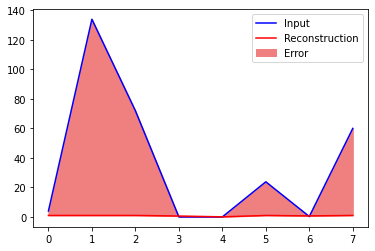

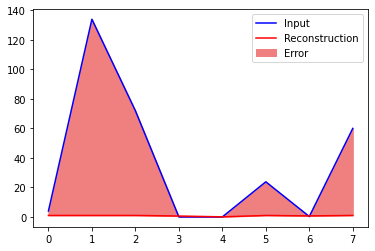

In [ ]:
#Now let's define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  enc_img = autoencoder.encoder(data)
  dec_img = autoencoder.decoder(enc_img)
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(8), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

plot(test_data, 0)
plot(test_data, 0)

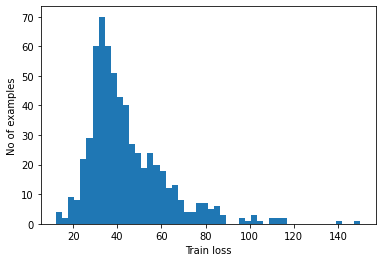

In [ ]:
reconstructions = autoencoder.predict(train_data)
train_loss = tf.keras.losses.mae(reconstructions, train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()


In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)


Threshold:  62.60381462151988


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.38311688311688313
Precision = 0.3722627737226277
Recall = 0.85
Confusion matrix:
[[ 8 86]
 [ 9 51]]
